# Marks_vs_StudyTime_using_Linear_Regression 

### Regression basically means we want to predict a continous value outcome

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load the data

In [2]:
import pandas as pd
x=pd.read_csv('./Linear_Regression_Data/Linear_X_Train.csv')
y=pd.read_csv('./Linear_Regression_Data/Linear_Y_Train.csv')

print(x.shape)
print(y.shape)
print(y.head())

 
print(type(x))
# Here we can see that x is in pandas data frame so converting it to numpy using .values

X=x.values
Y=y.values

# We have converted to numpy from Pandas
print(type(X))

(3750, 1)
(3750, 1)
           y
0  -0.091101
1 -53.467721
2  75.457009
3 -12.025286
4  57.414187
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


### Visualize the data

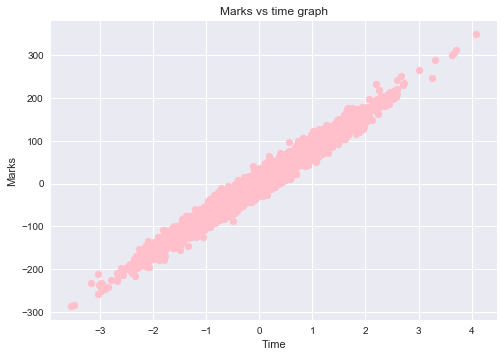

In [3]:
plt.style.use('seaborn')
plt.scatter(x,y,color='pink')
plt.title('Marks vs time graph')
plt.xlabel('Time')
plt.ylabel('Marks')
plt.show()

### We only normalize the x values we dont normalize the y values

In [4]:
u=X.mean()
std=X.std()
X=(X-u)/std

print(X.shape)
print(X.shape[0])

(3750, 1)
3750


# Applying Linear Regression

In [5]:
# yh is yhat i.e the estimated value of y

def hypo(x,theta):
    yh=theta[0]+theta[1]*x
    return yh




def gradient(X,Y,theta):
    m=X.shape[0]
    grad=np.zeros((2,))
    
    for i in range(m):
        yh=hypo(X[i],theta)
        grad[0]+=(yh-Y[i])
        grad[1]+=(yh-Y[i])*X[i]
    return grad/m
    # This division by m will divide both the values grad[0] and grad[1]



def error(X,Y,theta):
    m=X.shape[0]
    total_error=0.0
    
    for i in range(m):
        yh=hypo(X[i],theta)
        total_error+=(Y[i]-yh)**2
        # We are taking the square value instead of mod because this makes our function differnciable
        #i.e we are basically calculating mean squared error
    return total_error/m


def grad_des(X,Y,learn_rate=0.1,max_step=100):
    # np.zeros((2,)) it means we have a numpy array of two zeros
    theta=np.zeros((2,))
    error_list=[]
    
    for i in range(max_step):
        grad=gradient(X,Y,theta)
        e=error(X,Y,theta)
        error_list.append(e)
        
        
        theta[0]=theta[0]-(learn_rate*grad[0])
        theta[1]=theta[1]-(learn_rate*grad[1])
        
    return theta,error_list




theta,error_list=grad_des(X,Y)

print(theta)


[ 0.6838508  79.90361453]


### We can see the error is continously decreasing the printing the error list and after certain iterations it has almost saturated

In [6]:
error_list

[array([6576.35005246]),
 array([5363.12510257]),
 array([4380.41289317]),
 array([3584.41600355]),
 array([2939.65852295]),
 array([2417.40496367]),
 array([1994.37958066]),
 array([1651.72902041]),
 array([1374.18206661]),
 array([1149.36903404]),
 array([967.27047765]),
 array([819.77064698]),
 array([700.29578413]),
 array([603.52114523]),
 array([525.13368772]),
 array([461.63984713]),
 array([410.20983626]),
 array([368.55152745]),
 array([334.80829731]),
 array([307.47628091]),
 array([285.33734761]),
 array([267.40481165]),
 array([252.87945752]),
 array([241.11392067]),
 array([231.58383582]),
 array([223.8644671]),
 array([217.61177843]),
 array([212.54710061]),
 array([208.44471157]),
 array([205.12177646]),
 array([202.43019901]),
 array([200.25002128]),
 array([198.48407732]),
 array([197.05366271]),
 array([195.89502687]),
 array([194.95653185]),
 array([194.19635088]),
 array([193.58060429]),
 array([193.08184956]),
 array([192.67785822]),
 array([192.35062524]),
 array(

### We can see that after certain iterations error has become constant

Text(0.5, 1.0, 'Reduction in error with the maximum iterations')

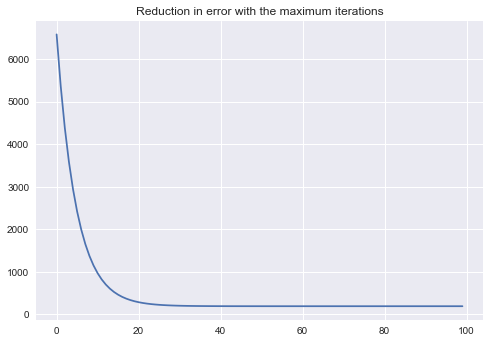

In [7]:
plt.plot(error_list)
plt.title("Reduction in error with the maximum iterations")

## Prediction of best line

(3750, 1)


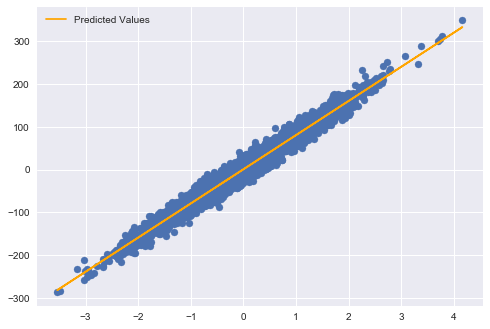

In [8]:
# Now we are giving the derived value of theta
# Here we can give a single value of X to the hypothesis funciton or we can provide with the full numpy array
# calculations will be holded in that way only 
yh=hypo(X,theta)
print(yh.shape)


# Scattering the original data and ploting the predicted line
plt.scatter(X,Y)
plt.plot(X,yh,color='orange',label='Predicted Values')
plt.legend()
plt.show()
#  Without legend label will not show up

# Making prection on Test Data

###  We have calculated Most optimal theta and by using that we are predcicting y

In [9]:
# Readind the testcases and converting it into numpy array by using values
X_Test=pd.read_csv('./Linear_Regression_Data/Linear_X_Test.csv').values


# After loading the X_test predict the y_test by hypothesis function by using our calculated theta
# Here again we can pass the entire numpy array to the hypothesis function so calculations are done that way only
Y_test=hypo(X_Test,theta)


# Now we have to submit it online so we have to create a csv file in the same format as Y_training data

# Columns represent number of coloumns and the name of coloumn
df=pd.DataFrame(data=Y_test,columns=["y"])



# Now we are creating a csv file without indexes i.e numbering 
df.to_csv('hardwork_pays_off_answer.csv',index=False)


### Score of submission is calculated using R2 score i.e (1- (sumation from 1 to m(  (yi-yh)** 2)/ (yi-yavg)** 2)))
### i.e highest value of R2 score can be 1 and lowest can be in negative also
### in best case yi=yh and R2 score will be 1 and in worst case we have yh=yavg so R2=0

In [10]:
def r2_score(Y,yh):
    num=np.sum((Y-yh)**2)
    deo=np.sum((Y-Y.mean())**2)
    
    score=1-(num/deo)
    return score*100

r2_score(Y,yh)

97.09612226971643

### So that's why our score is 97% on online judge